In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('yelp.csv')

In [8]:
df['length'] = df['text'].apply(len)

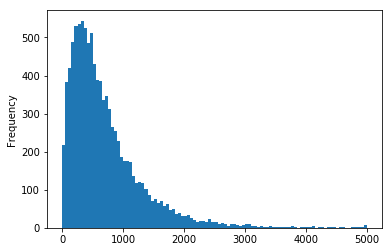

In [10]:
df['length'].plot(bins = 100, kind = 'hist')

In [22]:
df[df['length'] == 1]['text'].iloc[0]

'X'

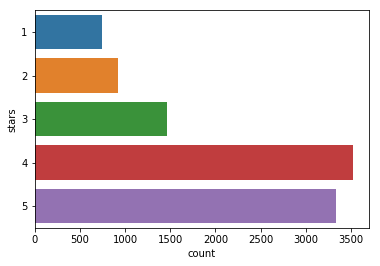

In [23]:
sns.countplot(y = 'stars', data = df)

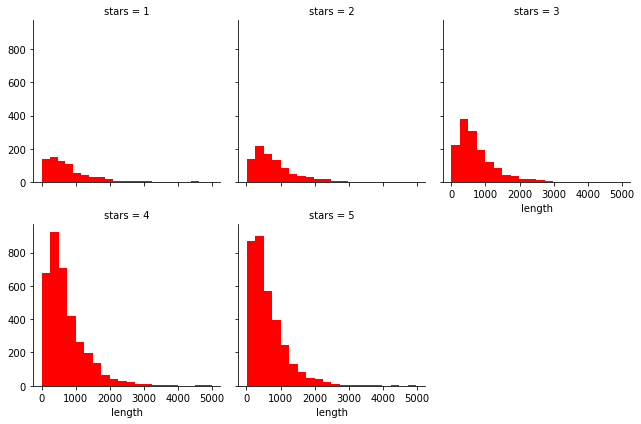

In [31]:
g = sns.FacetGrid(data = df, col = 'stars',col_wrap = 3)
g.map(plt.hist,'length', bins = 20, color ='r')

In [35]:
df_star1 = df[df['stars'] == 1]
df_star5 = df[df['stars'] == 5]

In [39]:
df_concat = pd.concat([df_star1,df_star5])

In [43]:
print('1-Stars =',((len(df_star1)/len(df_concat))*100))
print('5-Stars =',((len(df_star5)/len(df_concat))*100))

1-Stars = 18.330885952031327
5-Stars = 81.66911404796868


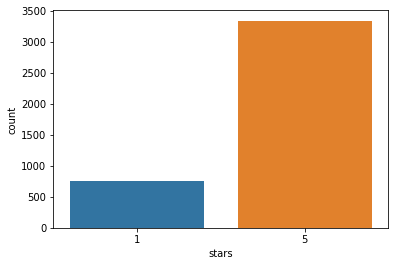

In [44]:
sns.countplot(df_concat['stars'], label = 'Count')

In [54]:
import string
from nltk.corpus import stopwords

In [57]:
def mess_cleaning(mess):
    text_punc_removed = [ char for char in mess if char not in string.punctuation]
    text_punc_removed = ''.join(text_punc_removed)
    text_punc_removed = [char for char in text_punc_removed.split() if char.lower() not in stopwords.words('english')]
    return text_punc_removed

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = mess_cleaning)

df_vectorizer = vectorizer.fit_transform(df_clean)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_vectorizer,df_concat['stars'].values,test_size = 0.2)

In [64]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

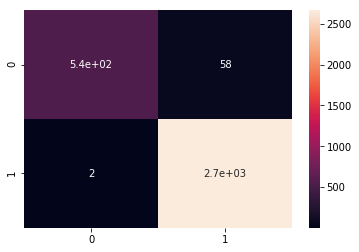

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_train = NB_classifier.predict(X_train)
y_pred_test = NB_classifier.predict(X_test)

cm = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot = True)

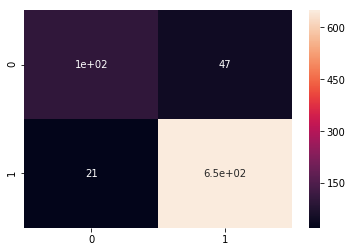

In [66]:
cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot = True)

In [67]:
print(classification_report(y_test,y_pred_test))

             precision    recall  f1-score   support

          1       0.83      0.68      0.75       148
          5       0.93      0.97      0.95       670

avg / total       0.91      0.92      0.91       818

